In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"placement.csv")

In [3]:
df.shape

(1000, 3)

In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [5]:
q1 =df['placement_exam_marks'].quantile(0.25)

In [6]:
q3=df['placement_exam_marks'].quantile(0.75)

In [7]:
q3

np.float64(44.0)

In [8]:
iqr = q3-q1

In [9]:
iqr

np.float64(27.0)

In [10]:
upper_limit=  q3+1.5*iqr
lower_limit=  q1-1.5*iqr

In [11]:
upper_limit

np.float64(84.5)

In [12]:
lower_limit

np.float64(-23.5)

In [13]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [15]:

#! trimming

new_df= df[df['placement_exam_marks']<upper_limit]
new_df.sample(8)

,cgpa,placement_exam_marks,placed
518,7.53,22.0,0
666,7.64,27.0,1
519,6.60,8.0,1
360,7.24,33.0,0
671,7.45,31.0,0
86,7.19,22.0,1
858,7.51,26.0,0
923,6.52,10.0,0


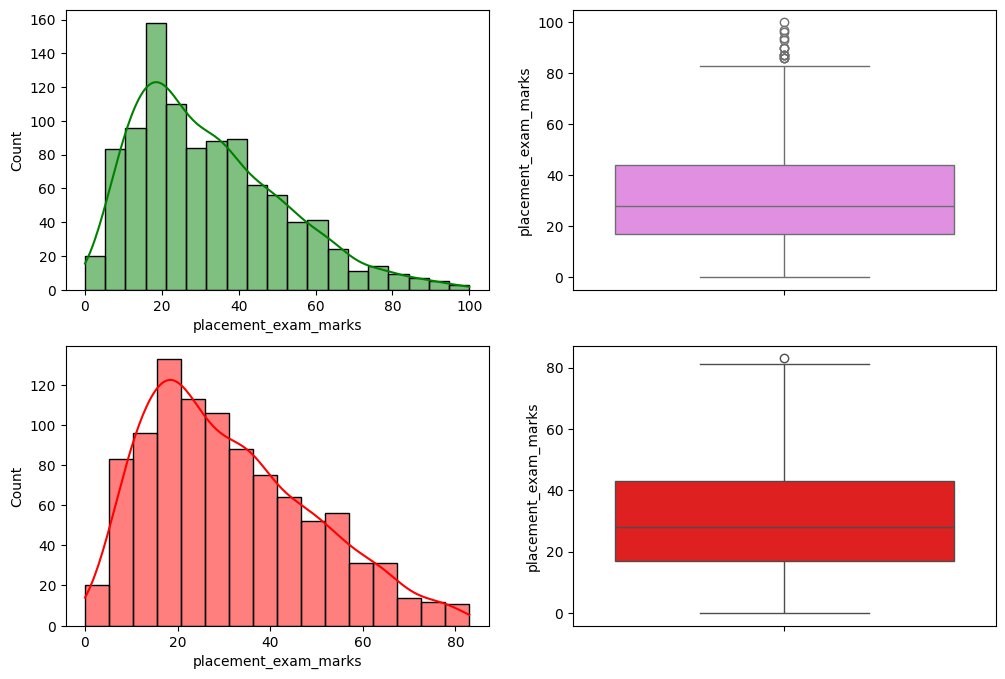

In [16]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
sns.histplot(df['placement_exam_marks'],ax=ax1,color='green',kde=True)
sns.boxplot(df['placement_exam_marks'],ax=ax2,color='violet')
sns.histplot(new_df['placement_exam_marks'],ax=ax3,color='red',kde=True)
sns.boxplot(new_df['placement_exam_marks'],ax=ax4,color='red')
plt.show()

### capping

In [17]:
new = df.copy()

In [18]:
new['more']= np.where(df['cgpa']>7,1 ,np.where(df['cgpa']<6,5,0))

In [19]:
new.sample(20)

,cgpa,placement_exam_marks,placed,more
679,6.70,35.0,0,0
411,6.04,66.0,0,0
281,7.68,22.0,1,1
781,7.17,49.0,1,1
339,7.32,18.0,1,1
728,6.63,23.0,0,0
970,7.28,42.0,1,1
258,6.12,6.0,1,0
428,7.89,46.0,0,1
185,7.30,31.0,0,1


In [20]:
new_df=df.copy()


new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### capping

In [21]:
new_df['placement_exam_marks']=np.where(


    new_df['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(

        new_df['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df['placement_exam_marks']


    )
)

In [22]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


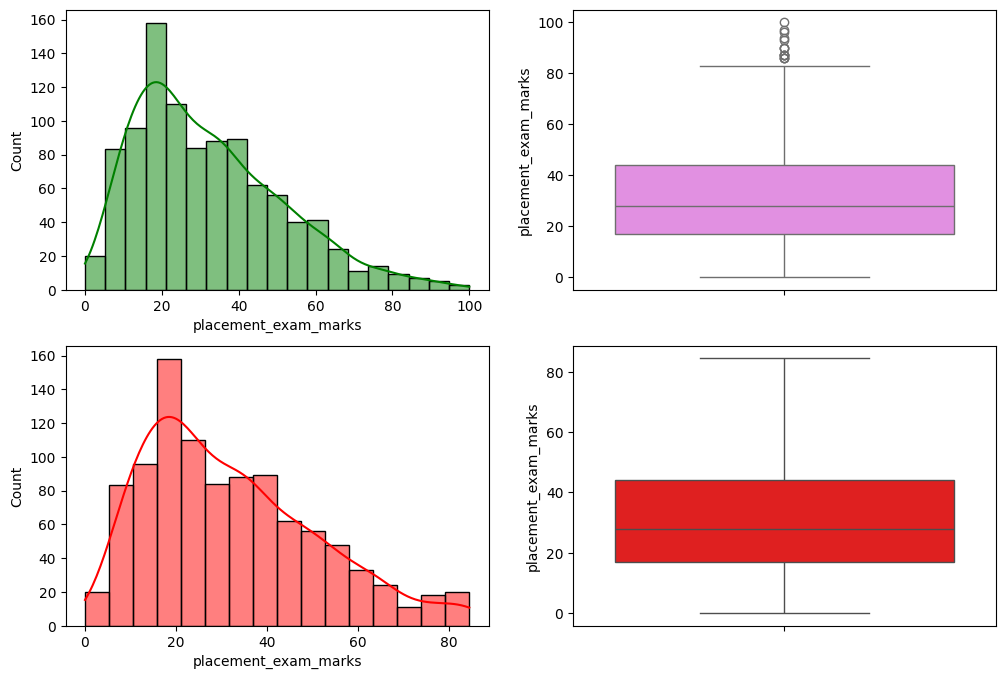

In [23]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
sns.histplot(df['placement_exam_marks'],ax=ax1,color='green',kde=True)
sns.boxplot(df['placement_exam_marks'],ax=ax2,color='violet')
sns.histplot(new_df['placement_exam_marks'],ax=ax3,color='red',kde=True)
sns.boxplot(new_df['placement_exam_marks'],ax=ax4,color='red')
plt.show()

In [24]:
titanic =pd.read_csv('titanic.csv')

In [25]:
titanic

,day-38/titanic.csvPassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,NaN,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S


<Axes: ylabel='Fare'>

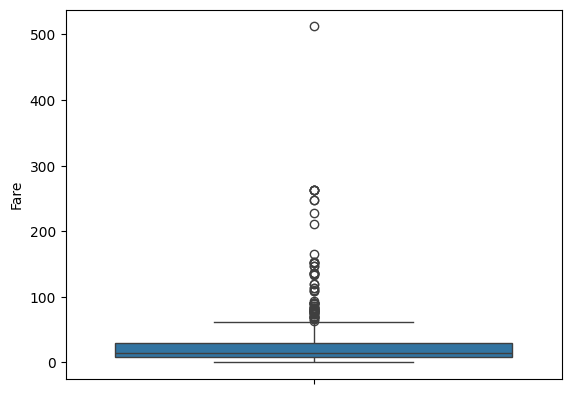

In [26]:
sns.boxplot(titanic['Fare'])

In [31]:
q1 = titanic['Fare'].quantile(0.25)
q3=titanic['Fare'].quantile(0.75)

iqr= q3-q1

upper_limits= q3+1.5*iqr;
lower_limits=q1-1.5*iqr

In [44]:
nos =titanic[(titanic['Fare']<upper_limits) & (titanic['Fare']>lower_limits)]


<Axes: ylabel='Fare'>

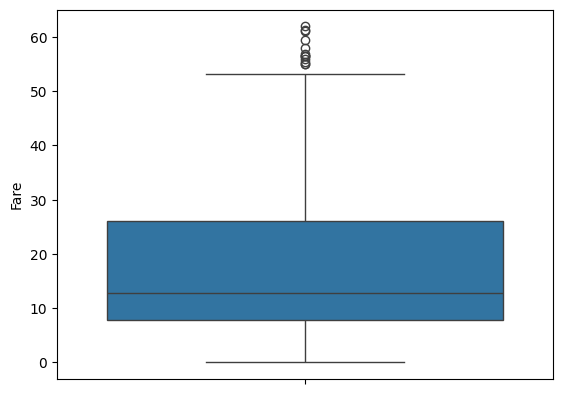

In [45]:
sns.boxplot(nos['Fare'])

### capping

In [39]:
no=titanic.copy()

In [40]:
no['Fare'] = np.where(



    no['Fare']>upper_limits,
    upper_limits,
    np.where( 
        no['Fare']<lower_limits,
        lower_limits,
        no['Fare']



    )
)

<Axes: ylabel='Fare'>

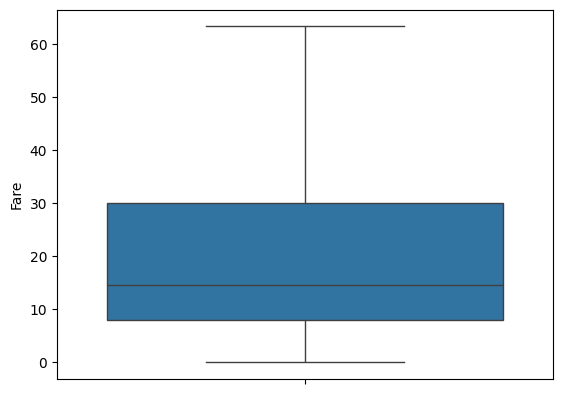

In [41]:
sns.boxplot(no['Fare'])

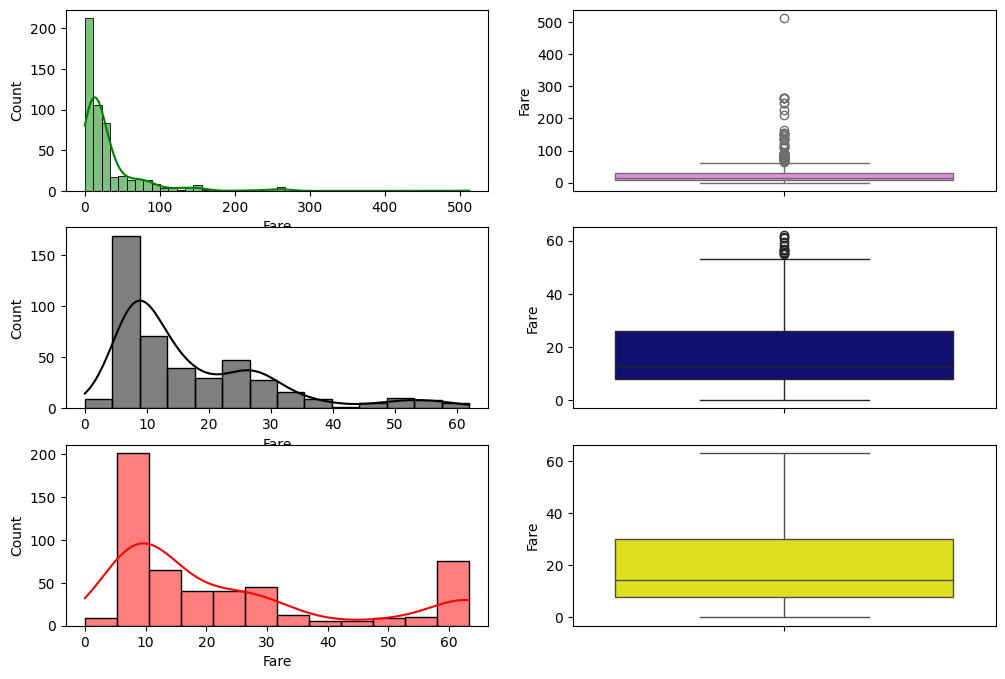

In [49]:
fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(12, 8))
sns.histplot(titanic['Fare'],ax=ax1,color='green',kde=True)
sns.boxplot(titanic['Fare'],ax=ax2,color='violet')
sns.histplot(nos['Fare'],ax=ax3,color='black',kde=True)
sns.boxplot(nos['Fare'],ax=ax4,color='navy')
sns.histplot(no['Fare'],ax=ax5,color='red',kde=True)
sns.boxplot(no['Fare'],ax=ax6,color='yellow')
plt.show()